<a href="https://colab.research.google.com/github/kaustubhadixit/Credit-Card-Fraud/blob/main/Preprocessing_and_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Preprocessing and Model evaluation**

---



### **Some Note-worthy Points**
*   The features are mostly PC components(28 out of 30) which we an not evaluate anything.
*   We found out in EDA that the dataset is highly imbalanced, so using accuracy as evaluation metric is not a clever idea, the performance metrics should be Confusion Matrix and PR(precision-recall) curve, or maybe Area under PR curve if a single-number metric is needed.
 

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/creditcard.csv") 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Data Split**

Test Train and Validate data set splitting

Two classes of fruadulent and not being fraudulent are really imbalanced


In [4]:
#test-train and scaling data set
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

x = df.drop('Class', axis = 1)
y = df['Class']
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y,random_state=7)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.333, stratify=y_train,random_state=7)

In [6]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
133442,80390.0,0.740984,-1.159582,-0.153618,0.882426,-0.814985,-0.248992,0.170795,-0.153598,-0.943552,0.641801,-0.749881,-0.215072,-0.420984,0.313670,0.193815,-2.105910,0.466151,0.591819,-1.338544,-0.047127,-0.199021,-0.603959,-0.286118,0.057442,0.527710,-0.259060,-0.007785,0.064953,296.96
31135,36227.0,-0.780844,0.494574,2.197306,1.534967,-0.386617,1.153088,-0.074777,0.528140,0.550138,-0.111279,0.435288,1.041613,-0.838094,-0.539276,-2.021736,-1.424416,0.904709,-0.505126,1.567234,0.072305,-0.292726,-0.316147,0.070363,0.003170,-0.364385,-0.445388,0.352196,0.209077,35.90
188004,127783.0,-2.596797,1.449293,-0.318149,-0.428106,-0.390529,-0.034531,0.092946,1.000824,0.730074,0.289158,-0.311317,1.171844,-0.441605,0.104951,-2.609367,-0.414219,0.207221,-0.419406,0.762069,0.168367,-0.384475,-0.661908,-0.077018,-0.385114,0.186976,0.127462,0.358354,0.418059,38.83
86554,61285.0,1.217627,-1.417515,0.696184,-1.212412,-1.841772,-0.609398,-1.026927,-0.064489,-1.713311,1.329809,0.014029,-0.874884,0.040038,-0.220743,1.043648,-0.541513,0.850984,-0.563866,-0.754210,-0.164374,-0.256285,-0.630228,0.154727,0.335793,-0.041319,-0.410897,0.035865,0.048394,126.05
179861,124268.0,2.052436,0.024136,-1.596052,0.474595,0.238145,-1.379271,0.608209,-0.533278,0.216936,0.069916,-0.696182,0.915615,0.938755,0.205845,-0.562175,-0.619584,-0.127503,-0.977653,0.181717,-0.132447,-0.010899,0.194556,0.048996,0.138013,0.206514,0.552584,-0.093326,-0.071078,23.95


In [7]:
y_train.head()

133442    0
31135     0
188004    0
86554     0
179861    0
Name: Class, dtype: int64

In [8]:
x_validate.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
235022,148209.0,1.876555,-0.677943,0.030167,0.958975,-1.133622,0.107030,-1.170058,0.238782,2.309412,-0.843912,-1.449834,0.577206,-0.117093,-2.407001,-1.557900,0.108310,1.104052,0.117430,0.290656,-0.145042,-0.196969,-0.051074,0.204988,-0.145606,-0.409569,0.577438,0.035560,-0.011282,27.03
86482,61255.0,1.442342,-0.473006,-2.123184,-1.674132,2.012195,2.760898,-0.580268,0.594512,-1.270083,0.344109,0.255343,-0.970976,0.037177,-0.733321,0.711131,1.376035,0.633410,-0.664617,0.826651,0.271638,0.148436,0.175574,-0.262527,0.974172,0.964258,-0.026516,-0.016367,0.020936,39.90
132882,80157.0,0.902842,-0.735549,1.228407,1.438787,-0.597468,2.005191,-1.058979,0.618228,1.413758,-0.325440,-0.477471,1.521198,0.562779,-1.043341,-2.021604,-0.294719,-0.115435,0.145303,0.512246,0.083030,-0.000618,0.329155,-0.315148,-1.084718,0.597079,-0.152178,0.106484,0.031241,104.10
268194,163103.0,0.558657,0.971685,-1.197220,0.328131,1.422573,-0.000450,1.215278,-0.289600,-1.131587,0.289135,0.354837,0.358821,0.560359,0.981603,0.845470,-1.300479,0.057342,0.733627,3.392622,0.288418,0.316095,1.080769,-0.235899,-0.045412,-0.622800,0.520162,0.225966,0.224946,22.50
178363,123599.0,0.259362,0.388198,0.140224,-1.588408,0.518067,-0.633688,0.615186,-0.133228,0.344169,-0.929353,-0.876982,0.426359,0.679658,-0.142731,0.018635,-0.144054,-0.418120,-0.505889,0.093560,-0.080687,0.029557,0.197112,-0.022775,0.681149,-0.415231,0.706414,-0.041566,-0.007071,1.00


In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4001,kind='regular')
X_res, y_res = sm.fit_sample(x_train, y_train)
pd.value_counts(y_res)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    142228
0    142228
dtype: int64

## Prediction and Evaluation of Logistic Regression


**We will use PR AUC over ROC AUC cause PR does not account for true negatives therefore more suited for imbalanced classification**

### Original

In [12]:
from sklearn.linear_model import LogisticRegressionCV
logCV = LogisticRegressionCV(Cs=[0.01,0.1,1,10,100], scoring='average_precision',verbose=0,max_iter = 700, random_state=70)
logCV.fit(x_train,y_train)
print("The best parameter C is",logCV.C_[0])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The best parameter C is 0.1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


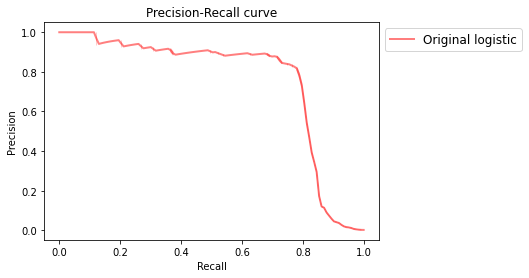

In [23]:
from sklearn.metrics import average_precision_score, precision_recall_curve
pred_prob = logCV.predict_proba(x_validate)
y_score = pred_prob[:,1]
average_precision = average_precision_score(y_validate, y_score)
original_precision, original_recall, original_thresholds = precision_recall_curve(y_validate, y_score)

#Plot
sns.lineplot(original_recall, original_precision, color='red', alpha=0.5,linewidth=2,label='Original logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

Above lineplot shows how our model performerd and we can choose an optimised cutoff for best precisionand recall rate.

### Resampled

In [20]:
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression(C=0.1, verbose=0, random_state=70)
log_res.fit(X_res,y_res)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5001, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


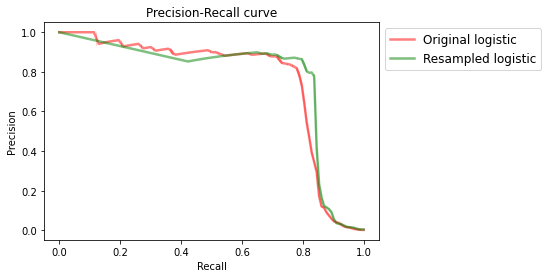

In [21]:
predict_prob = log_res.predict_proba(x_validate)
resampled_score = predict_prob[:,1]
average_precision = average_precision_score(y_validate, y_score)
resampled_precision, resampled_recall, resampled_thresholds = precision_recall_curve(y_validate, resampled_score)

#Plot
sns.lineplot(original_recall, original_precision, color='red', alpha=0.5,linewidth=2.5,label='Original logistic')
sns.lineplot(resampled_recall, resampled_precision, color='green', alpha=0.5,linewidth=2.5,label='Resampled logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

## Prediction and Evaluation Random Forest

### Resampled

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=4, n_estimators=150, bootstrap=True, random_state=70)
rf.fit(X_res,y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=707,
                       verbose=0, warm_start=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


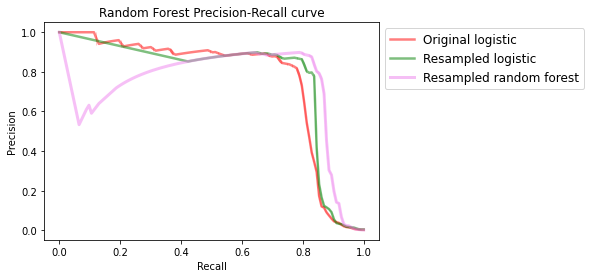

In [27]:
pred_prob = rf.predict_proba(x_validate)
rf_score = pred_prob[:,1]
average_precision = average_precision_score(y_validate, y_score)
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(y_validate, rf_score)

#Plot
sns.lineplot(original_recall, original_precision, color='red', alpha=0.5,linewidth=2.5,label='Original logistic')
sns.lineplot(resampled_recall, resampled_precision, color='green', alpha=0.5,linewidth=2.5,label='Resampled logistic')
sns.lineplot(rf_recall, rf_precision, color='violet', alpha=0.5,linewidth=3,label='Resampled random forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

### Original

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(max_depth=4, n_estimators=150, bootstrap=True, random_state=70)
rf1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=70, verbose=0,
                       warm_start=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

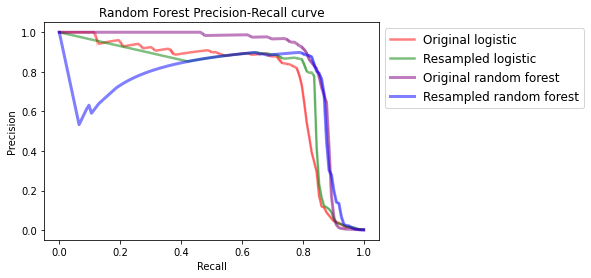

In [34]:
pred_prob = rf1.predict_proba(x_validate)
rf1_score = pred_prob[:,1]
average_precision = average_precision_score(y_validate, y_score)
rf1_precision, rf1_recall, rf1_thresholds = precision_recall_curve(y_validate, rf1_score)

#Plot
sns.lineplot(original_recall, original_precision, color='red', alpha=0.5,linewidth=2.5,label='Original logistic')
sns.lineplot(resampled_recall, resampled_precision, color='green', alpha=0.5,linewidth=2.5,label='Resampled logistic')
sns.lineplot(rf1_recall, rf1_precision, color='purple', alpha=0.5,linewidth=3,label='Original random forest')
sns.lineplot(rf_recall, rf_precision, color='blue', alpha=0.5,linewidth=3,label='Resampled random forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

### Cluster Before Prediction on Original Set

In [47]:
from sklearn.cluster import KMeans
x_train_minority, x_train_majority = x_train[y_train==1], x_train[y_train==0]
kmeans = KMeans(n_clusters=20, random_state=70).fit(x_train_majority)

In [48]:
prediction = [0]*len(x_validate)
for i in range(0,20):
        majority_segment = x_train_majority[kmeans.labels_==i]
        X_train_segment = pd.concat([majority_segment,x_train_minority])
        y_train_segment = [0]*len(majority_segment)+[1]*len(x_train_minority)
        RF = RandomForestClassifier(max_depth=4, n_estimators=100, bootstrap=True,random_state=701)
        RF.fit(X_train_segment,y_train_segment)
        pred_prob = RF.predict_proba(x_validate)
        prediction = np.add(prediction, pred_prob[:,1])
prediction = prediction/20

In [49]:
y_score = prediction
average_precision = average_precision_score(y_validate, y_score)
cls_precision, cls_recall, cls_thresholds = precision_recall_curve(y_validate, y_score)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

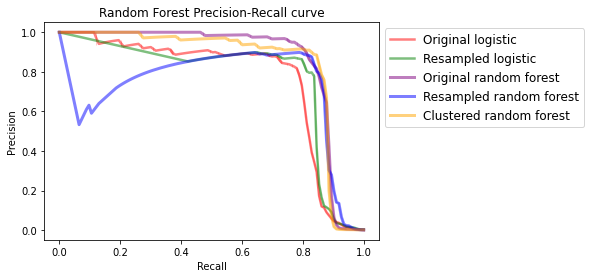

In [51]:
# Final Plot
sns.lineplot(original_recall, original_precision, color='red', alpha=0.5,linewidth=2.5,label='Original logistic')
sns.lineplot(resampled_recall, resampled_precision, color='green', alpha=0.5,linewidth=2.5,label='Resampled logistic')
sns.lineplot(rf1_recall, rf1_precision, color='purple', alpha=0.5,linewidth=3,label='Original random forest')
sns.lineplot(rf_recall, rf_precision, color='blue', alpha=0.5,linewidth=3,label='Resampled random forest')
sns.lineplot(cls_recall, cls_precision, color='orange', alpha=0.5,linewidth=3,label='Clustered random forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

**It is pretty clear that *Original Random Forest* have maximum area under the curve, its pretty high in precision compared to any other but it may be overfitted so for more realistic prediction lets go with *Clustered Random Forest***

**When Recall Rate is in range 0.0-0.5, *Clustered Random Forest* is most promising**

## **Threshold and Confusion Matrix**

In [52]:
error = []
for recall, precision in zip(cls_recall, cls_precision):
    err = (recall-0.90)**2 + (precision-0.83)**2
    error.append(err)
error = np.asarray(error)
min_index = np.where(error==min(error))
opt_threshold = cls_thresholds[min_index]
"The optimised threshold is: {0:0.3f}".format(opt_threshold[0])

'The optimised threshold is: 0.753'

Text(0.5, 1.0, 'Confusion matrix for validation set')

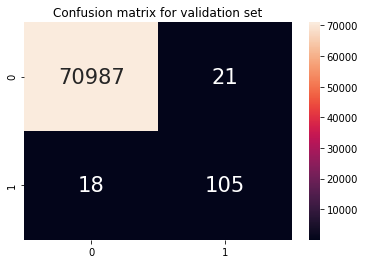

In [53]:
from sklearn.metrics import confusion_matrix
y_pred = [1 if x > opt_threshold else 0 for x in y_score]
conf = confusion_matrix(y_validate,y_pred)
conf = pd.DataFrame(conf, range(2),range(2))
sns.heatmap(conf, annot=True, fmt='g', annot_kws={"size": 21})
plt.title('Confusion matrix for validation set')

# Lets Now **Predict on Test set**

Text(0.5, 1.0, 'Confusion matrix for prediction on test set')

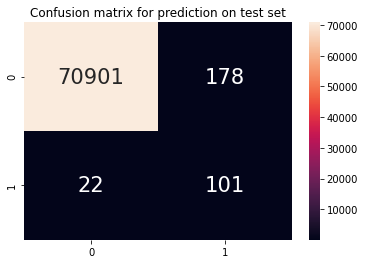

In [54]:
pred_prob = RF.predict_proba(x_test)
y_score = pred_prob[:,1]
y_pred = [1 if x > opt_threshold else 0 for x in y_score]
conf = confusion_matrix(y_test,y_pred)
conf = pd.DataFrame(conf, range(2),range(2))
sns.heatmap(conf, annot=True, fmt='g', annot_kws={"size": 21})
plt.title('Confusion matrix for prediction on test set')

**Results are Pretty good on our chosen model and threshold set and we have similar results in validation set too.**



*   In actual situations, accuracy in imbalanced datasets is less prior to choosing an optimised point. We can even lower our precision for better recall.
*   Loss of not identifying positive ones is much much more than false positives.

